<a href="https://colab.research.google.com/github/akshats13/neural_MNIST/blob/main/mnistcnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader
from torchvision import transforms, datasets
from torchvision.utils import make_grid

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline


In [5]:
#creating the transform variable to convert mnist images to 4d tensors
transform =  transforms.ToTensor()


In [6]:
#loading the training data
train_data = datasets.MNIST(root='/cnn_mnist', train= True, download=True, transform=transform)

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 9912422/9912422 [00:00<00:00, 71642733.74it/s]


Extracting /cnn_mnist/MNIST/raw/train-images-idx3-ubyte.gz to /cnn_mnist/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 28881/28881 [00:00<00:00, 21732273.74it/s]

Extracting /cnn_mnist/MNIST/raw/train-labels-idx1-ubyte.gz to /cnn_mnist/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden




100%|██████████| 1648877/1648877 [00:00<00:00, 76602365.86it/s]


Extracting /cnn_mnist/MNIST/raw/t10k-images-idx3-ubyte.gz to /cnn_mnist/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4542/4542 [00:00<00:00, 4645337.42it/s]


Extracting /cnn_mnist/MNIST/raw/t10k-labels-idx1-ubyte.gz to /cnn_mnist/MNIST/raw



In [ ]:
train_data


Dataset MNIST
    Number of datapoints: 60000
    Root location: /cnn_mnist
    Split: Train
    StandardTransform
Transform: ToTensor()

In [8]:
#loading the testing data
test_data = datasets.MNIST(root='/cnn_mnist', train= False, download=True, transform=transform)

In [9]:
train_loader = DataLoader(train_data, batch_size=10, shuffle= True)
test_loader = DataLoader(test_data, batch_size=10, shuffle=False)


In [10]:
# creating the model class
class ConvoModel(nn.Module):
  def __init__(self):
      super().__init__()
      #convo layer
      self.conv1 = nn.Conv2d(1,6,3,1) #input, output, kernel, stride
      self.conv2 = nn.Conv2d(6,16,3,1)
      #fully-connected layer
      self.fc1 = nn.Linear(400,120)
      self.fc2 = nn.Linear(120,84)
      self.fc3 = nn.Linear(84,10)

      #forward pass/function
  def forward(self,x):
    #frist pass
    x = F.relu(self.conv1(x))
    x = F.max_pool2d(x,2,2) # 2/2 kernel with a stride of 2
    #second pass
    x = F.relu(self.conv2(x))
    x = F.max_pool2d(x,2,2)

    #re-view to flateen the data out
    x = x.view(-1,400)

    #first fully connected layer
    x = F.relu(self.fc1(x))
    #second fully connected layer
    x = F.relu(self.fc2(x))
    #third fully connected layer
    x = self.fc3(x)
    return F.log_softmax(x, dim=1)







In [11]:
#creating an instance of our model
torch.manual_seed(41)
model = ConvoModel()
model


ConvoModel(
  (conv1): Conv2d(1, 6, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(3, 3), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)

In [12]:
#loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

In [13]:
import time
start_time = time.time()

#create variables to track things
epochs = 5
train_losses = []
test_losses = []
train_correct = []
test_correct = []

#looping of epochs
for i in range(epochs):
  train_corr = 0
  test_corr = 0

   #train
  for batch,(x_train,y_train) in enumerate(train_loader):
    batch+=1
    y_pred = model(x_train) # getting th predicted values from the training set
    loss=criterion(y_pred, y_train)

    predicted = torch.max(y_pred.data, 1)[1] # adding the number of correct predictions
    batch_corr = (predicted == y_train).sum() # number of correct predictions in this particular batch
    train_corr += batch_corr

    #Updating the parameters
    optimizer.zero_grad() #resetting the gradients before the next iteration
    loss.backward() # back propogating the loss
    optimizer.step()

    # printing results for reference
    if batch%600 == 0:
      print(f"Epoch: {i} Batch: {batch} Loss: {loss.item()}")

  train_losses.append(loss)
  train_correct.append(train_corr)

   #test
  with torch.no_grad():
    for batch,(x_test,y_test) in enumerate(test_loader):
      y_val = model(x_test)
      predicted = torch.max(y_val.data, 1)[1] #adding all the correct predictions
      test_corr += (predicted == y_test).sum()

  loss = criterion(y_val, y_test)
  test_losses.append(loss)
  test_correct.append(test_corr)


current_time = time.time()
total_time = current_time - start_time
print(f"Total time taken is {total_time/60} minutes!")

Epoch: 0 Batch: 600 Loss: 0.1623610556125641
Epoch: 0 Batch: 1200 Loss: 0.1502392590045929
Epoch: 0 Batch: 1800 Loss: 0.4744560718536377
Epoch: 0 Batch: 2400 Loss: 0.14238706231117249
Epoch: 0 Batch: 3000 Loss: 0.007758188061416149
Epoch: 0 Batch: 3600 Loss: 0.3836284875869751
Epoch: 0 Batch: 4200 Loss: 0.0038223876617848873
Epoch: 0 Batch: 4800 Loss: 0.0021286322735249996
Epoch: 0 Batch: 5400 Loss: 0.0569545142352581
Epoch: 0 Batch: 6000 Loss: 0.00038789428072050214
Epoch: 1 Batch: 600 Loss: 0.005851339548826218
Epoch: 1 Batch: 1200 Loss: 0.3855525553226471
Epoch: 1 Batch: 1800 Loss: 0.004819948226213455
Epoch: 1 Batch: 2400 Loss: 0.003216963727027178
Epoch: 1 Batch: 3000 Loss: 0.0332382395863533
Epoch: 1 Batch: 3600 Loss: 0.5372857451438904
Epoch: 1 Batch: 4200 Loss: 0.04561494290828705
Epoch: 1 Batch: 4800 Loss: 0.0007510822033509612
Epoch: 1 Batch: 5400 Loss: 0.0001173773780465126
Epoch: 1 Batch: 6000 Loss: 0.14201366901397705
Epoch: 2 Batch: 600 Loss: 0.023733172565698624
Epoch: 2

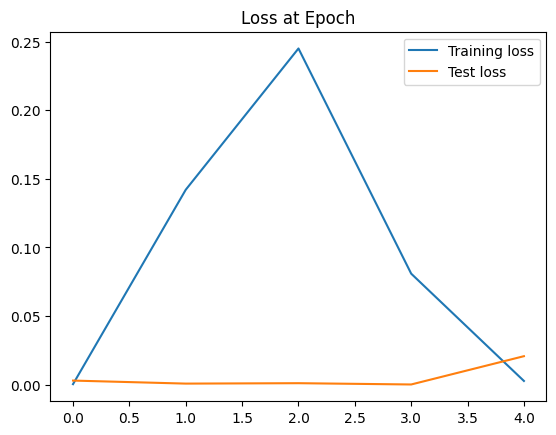

In [14]:
train_losses = [tl.item() for tl in train_losses]
plt.plot(train_losses, label='Training loss')
plt.plot(test_losses, label='Test loss')
plt.title("Loss at Epoch")
plt.legend()

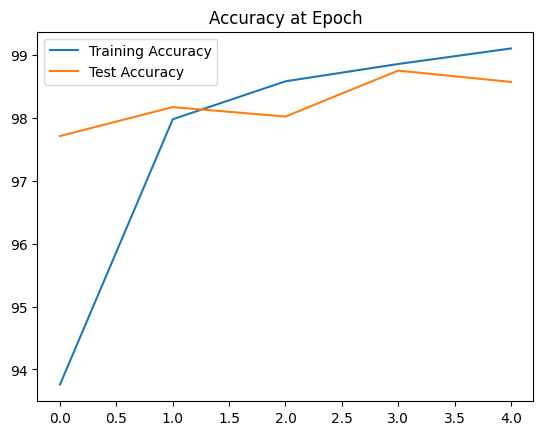

In [15]:
plt.plot([t/600 for t in train_correct], label='Training Accuracy')
plt.plot([t/100 for t in test_correct], label='Test Accuracy')
plt.title("Accuracy at Epoch")
plt.legend()

In [16]:
all_test_loaded = DataLoader(test_data, batch_size=10000, shuffle=False)

In [17]:
with torch.no_grad():
  correct= 0
  for x_test, y_test in all_test_loaded:
    y_val = model(x_test)
    predicted = torch.max(y_val, 1)[1]
    correct += (predicted == y_test).sum()

In [19]:
#testing accuracy
correct.item()/len(test_data)

0.9857

In [22]:
#grabbing a random image
test_data[4141]

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 

In [23]:
#reshaping the data
test_data[4141][0].reshape(28,28)


tensor([[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000

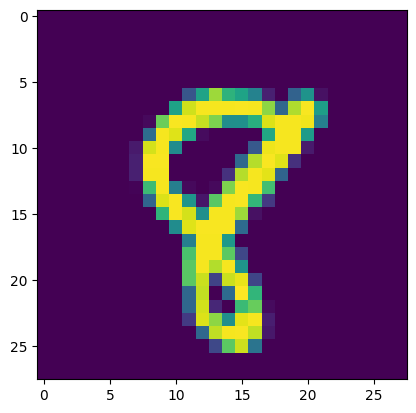

In [24]:
#showing the image captured
plt.imshow(test_data[4141][0].reshape(28,28))

In [25]:
#passing the image to the model
model.eval()
with torch.no_grad():
  new_prediction = model(test_data[4141][0].view(1,1,28,28)) # batch size of 1 , 1 color channel , 28*28 image


In [28]:
new_prediction.argmax()

tensor(8)